# Story - 4 : How much do we get paid?

#### Instructions
I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

##### Notes:
- You will need to identify reliable sources for salary data and assemble the data sets that you will need.
- Your visualization(s) must show the most salient information (variation in average salary by role and by state).
- For this Story you must use a code library and code that you have written in R, Python or Java Script (additional coding in other languages is allowed).
- Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).

### Start of Work

In [10]:
import pandas as pd
import requests
import re
import viz_lib as vl
import matplotlib.pyplot as plt


In [2]:
## Firstly, im reading in the data. There were several State by State breakdowns for avg salaries from Zip recruiter.
## I used AI to extract teh data tables to start this visualizations. 

In [11]:
## Creating a dictionary of titles and URLS with Data 
data_dict = {"data_analyst":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Analyst-Salary-by-State",
        "local_file":"./data/data_analyst_salary_by_state_2025.csv"},
    "data_scientist":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-DATA-Scientist-Salary-by-State",
        "local_file":"./data/data_scientist_salary_by_state_2025.csv"},
    "data_engineer":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-BIG-DATA-Engineer-Salary-by-State",
        "local_file":"./data/data_engineer_salary_by_state_2025.csv"},
    "lead_data_architect":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Lead-DATA-Architect-Salary-by-State",
        "local_file":"./data/lead_data_architect_by_state_2025.csv"},
    "data_manager":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Manager-Salary-by-State",
        "local_file":"./data/data_manager_by_state_2025.csv"},
    "data_editor":{"source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Editor-Salary-by-State",
        "local_file":"./data/data_editor_by_state_2025.csv"}
            }

In [12]:
data_df_list =[]
for key, val in data_dict.items():
    print(key)
    df = pd.read_csv(val["local_file"])
    if key == 'data_engineer':
        lim_df= df[["state","annual_salary_usd"]]        
    elif key in ['data_manager',"data_editor"]:
        lim_df = df[["State","Annual Salary (USD)"]]
        lim_df = lim_df.rename(columns={"State":"state","Annual Salary (USD)":"annual_salary_usd"})
    else:
        ## Kepping core columns for analysis
        lim_df = df[["state","state_abbr","annual_salary_usd"]]
    lim_df = lim_df.rename(columns={"annual_salary_usd":f"{key}_salary"})
    data_df_list.append(lim_df)

data_analyst
data_scientist
data_engineer
lead_data_architect
data_manager
data_editor


In [13]:
## Formatting Text before merge. 
for i, df in enumerate(data_df_list):
    df["state"] = df["state"].astype(str).str.strip().str.upper()
## Putting it all in one df
all_data=data_df_list[0].merge(
    data_df_list[1], how='left', on=["state","state_abbr"]).merge(
    data_df_list[2],how='left',on=["state"]).merge(
    data_df_list[3],how='left', on=["state","state_abbr"]).merge(
    data_df_list[4],how='left',on=["state"]).merge(
    data_df_list[5],how='left',on=["state"])

In [14]:
all_data

,state,state_abbr,data_analyst_salary,data_scientist_salary,data_engineer_salary,lead_data_architect_salary,data_manager_salary,data_editor_salary
0,WASHINGTON,WA,93598,139013,148371,165101,110026,67739
1,DISTRICT OF COLUMBIA,DC,93386,138698,148034,164727,109776,67586
2,NEW YORK,NY,90411,134280,143319,159480,106280,65433
3,MASSACHUSETTS,MA,90253,134046,143069,159201,106094,65319
4,ALASKA,AK,88999,132182,141080,156989,104620,64411
5,VERMONT,VT,87867,130502,139287,154993,103289,63592
6,NORTH DAKOTA,ND,87440,129867,138609,154239,102787,63283
7,OREGON,OR,87374,129770,138505,154123,102710,63235
8,COLORADO,CO,86898,129062,137749,153282,102149,62890
9,HAWAII,HI,85860,127520,136104,151452,100929,62139


In [15]:
#### Viz 1

In [16]:
role_cols = {
    "data_analyst_salary": "Data Analyst",
    "data_scientist_salary": "Data Scientist",
    "data_engineer_salary": "Data Engineer",
    "lead_data_architect_salary": "Lead Data Architect",
    'data_manager_salary':"Data Manager",
    "data_editor_salary":"Data Editor"
}

for c in role_cols:
    all_data[c] = pd.to_numeric(all_data[c], errors="coerce")

viz1_df = pd.DataFrame([(label, all_data[col].min(), all_data[col].max()) for col, label in role_cols.items()],
                       columns=["position", "min_pay", "max_pay"]).sort_values("max_pay", ascending=False).reset_index(drop=True)
viz1_df

,position,min_pay,max_pay
0,Lead Data Architect,108935,165101
1,Data Engineer,97896,148371
2,Data Scientist,91721,139013
3,Data Manager,72595,110026
4,Data Analyst,61756,93598
5,Data Editor,44695,67739


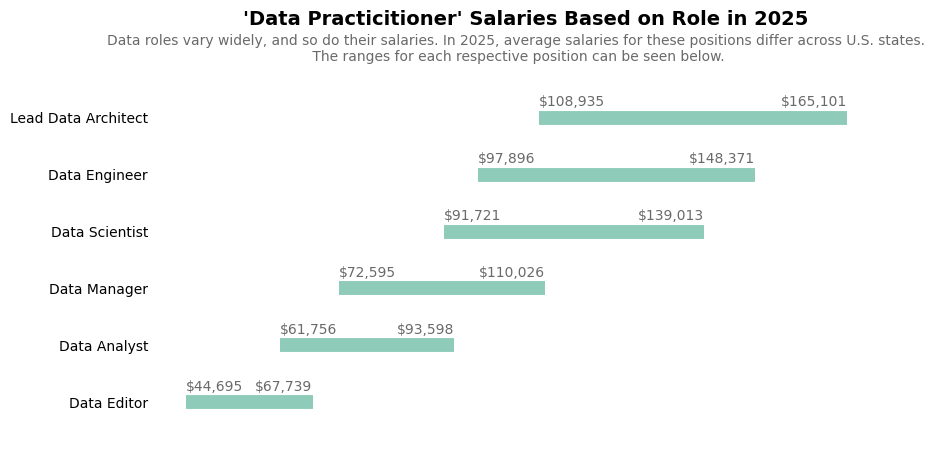

In [17]:
ax = vl.make_span_chart(
    viz1_df,
    category="position",
    x_min="min_pay",
    x_max="max_pay",
    title="'Data Practicitioner' Salaries Based on Role in 2025", # Data Practicitioner 
    subtitle="Data roles vary widely, and so do their salaries. In 2025, average salaries for these positions differ across U.S. states.\n The ranges for each respective position can be seen below.",
    color="#43AA8B",
    use_suptitle=True,          
    subtitle_on_axes=True,      
    title_x=0.59,               
    title_y=0.90,               
    top_adjust=0.82,            
    tight_rect=(0, 0, 1, 0.95), 
    x_lab="",
    x_axis_show=False,
    y_ticks_show=False,
    grid=False,
    figsize=(9, 5)
)
plt.show()


In [18]:
## Viz2 - By State regardless of position 
state_based_df_list = []

for i, r in all_data.iterrows():
    state = r['state']
    min_sal = min([r["data_analyst_salary"],r["data_scientist_salary"],r["data_engineer_salary"],r["lead_data_architect_salary"]])
    max_sal = max([r["data_analyst_salary"],r["data_scientist_salary"],r["data_engineer_salary"],r["lead_data_architect_salary"]])
    temp_df = pd.DataFrame([{
        "state":state,
        "min_salary":min_sal,
        "max_salary":max_sal
    }])
    state_based_df_list.append(temp_df)
viz_2 = pd.concat(state_based_df_list)

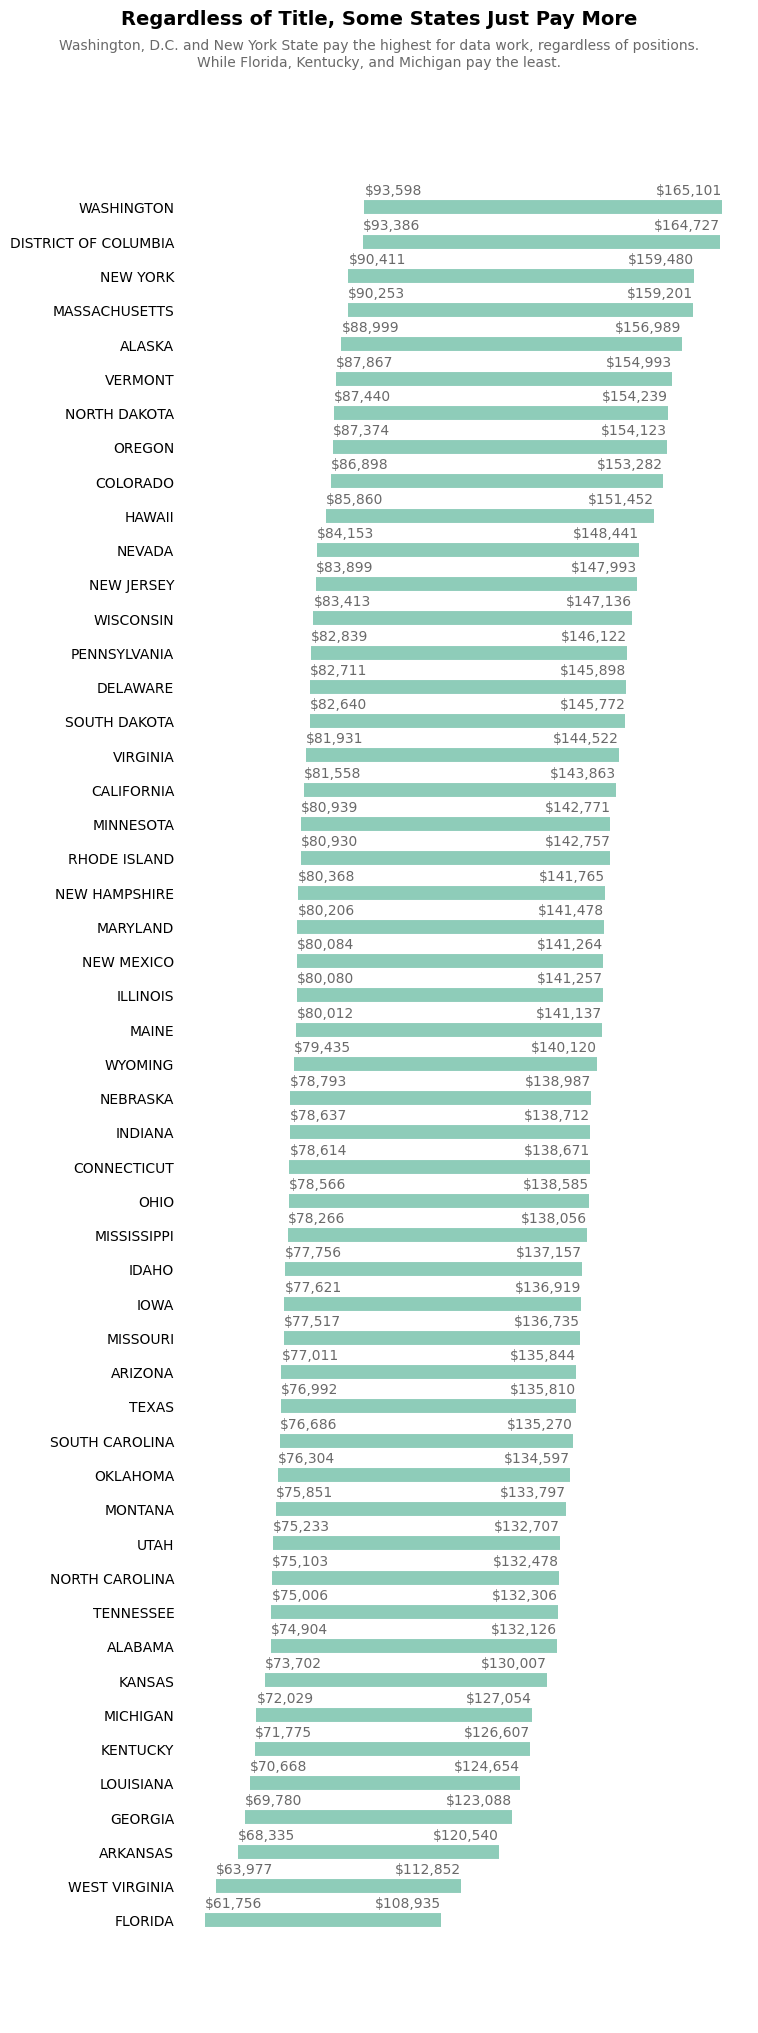

In [19]:
ax = vl.make_span_chart(
    viz_2,
    category="state",
    x_min="min_salary",
    x_max="max_salary",
    title="Regardless of Title, Some States Just Pay More",
    subtitle=("Washington, D.C. and New York State pay the highest for data work, "
              "regardless of positions.\nWhile Florida, Kentucky, and Michigan pay the least."),
    color="#43AA8B",
    x_axis_show=False, y_ticks_show=False, grid=False,
    figsize=(8, 21),
    annotated_labels_placement_pad=0.28,
    use_suptitle=True,
    subtitle_on_axes=False,
    title_y=0.986,
    subtitle_y=0.972,
    top_adjust=0.965,
    tight_rect=(0.02, 0.02, 0.98, 0.964)
)
ax.margins(y=0.06)
plt.show()


In [20]:
## Viz Three
highest_paying_role = []

for i, r in all_data.iterrows():
    state = r['state']
    max_sal = max([r[col] for col in all_data.columns if 'salary' in col])
    if max_sal == r["data_analyst_salary"]:
        role_ = "Data Analyst"
    if max_sal == r["data_scientist_salary"]:
        role_ = "Data Scientist"        
    if max_sal == r["data_engineer_salary"]:
        role_ = "Data Engineer" 
    if max_sal == r["lead_data_architect_salary"]:
        role_ = "Lead Data Architect"   
    if max_sal == r["data_manager_salary"]:
        role_ = "Data Manager" 
    if max_sal == r["data_editor_salary"]:
        role_ = "Data Editor" 
    ## Runner up 
    runner_up_sal = max([r[col] for col in all_data.columns if (('salary' in col)&("architect" not in col ))])
    if runner_up_sal == r["data_analyst_salary"]:
        ru_role_ = "Data Analyst"
    if runner_up_sal == r["data_scientist_salary"]:
        ru_role_ = "Data Scientist"        
    if runner_up_sal == r["data_engineer_salary"]:
        ru_role_ = "Data Engineer" 
    if runner_up_sal == r["data_manager_salary"]:
        ru_role_ = "Data Manager" 
    if runner_up_sal == r["data_editor_salary"]:
        ru_role_ = "Data Editor" 
    # Loweest Paying
    min_sal = min([r[col] for col in all_data.columns if 'salary' in col])
    if min_sal == r["data_analyst_salary"]:
        role_min = "Data Analyst"
    if min_sal == r["data_scientist_salary"]:
        role_min = "Data Scientist"        
    if min_sal == r["data_engineer_salary"]:
        role_min = "Data Engineer" 
    if min_sal == r["lead_data_architect_salary"]:
        role_min = "Lead Data Architect"   
    if min_sal == r["data_manager_salary"]:
        role_min = "Data Manager" 
    if min_sal == r["data_editor_salary"]:
        role_min = "Data Editor"   


    
    temp_df = pd.DataFrame([{
        "state":state,
        "best_paying_role":role_,
        "runner_up_role":ru_role_,
        "lowest_paying":role_min
    }])
    highest_paying_role.append(temp_df)
viz_3 = pd.concat(highest_paying_role)


In [21]:
# viz_3[viz_3["state"].isnull()]

C:\Users\johnf\Documents\Github\CUNY_SPS_WORK\FALL2025\DATA608\Story4\viz_lib.py:248: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.0, 0.0, 0.86, title_y - 0.01])


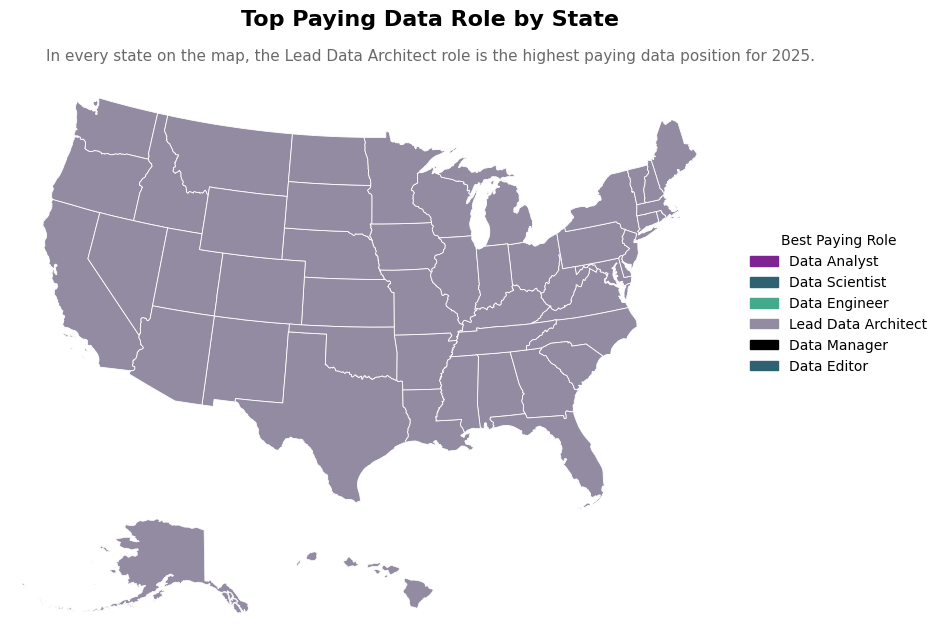

In [22]:
fig, axes = vl.make_state_map_insets(
    viz_3, 
    state_col="state",
    category_col="best_paying_role",
    colors={
        "Data Analyst":"#802392",
        "Data Scientist":"#2E6171",
        "Data Engineer":"#43AA8B",
        "Lead Data Architect":"#938BA1",
        "Data Manager":"#000000",
        "Data Editor":"#2E6171",
    },
    title="Top Paying Data Role by State",
    subtitle="In every state on the map, the Lead Data Architect role is the highest paying data position for 2025.",
    legend_title="",
    title_y=0.97,      
    subtitle_pad=16,   
    figsize=(10, 7)
)


C:\Users\johnf\Documents\Github\CUNY_SPS_WORK\FALL2025\DATA608\Story4\viz_lib.py:248: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.0, 0.0, 0.86, title_y - 0.01])


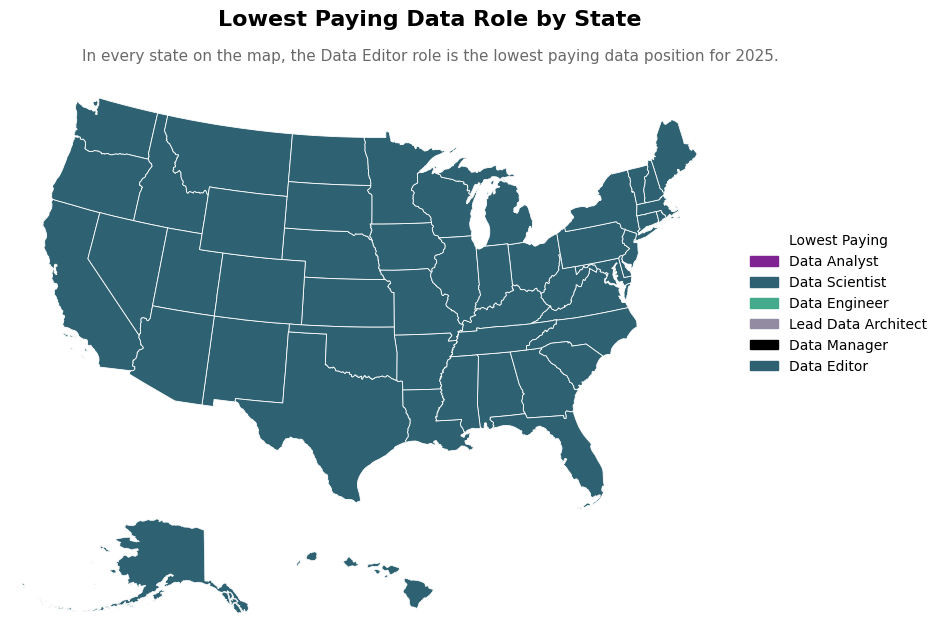

In [24]:
fig, axes = vl.make_state_map_insets(
    viz_3, 
    state_col="state",
    category_col="lowest_paying",
    colors={
        "Data Analyst":"#802392",
        "Data Scientist":"#2E6171",
        "Data Engineer":"#43AA8B",
        "Lead Data Architect":"#938BA1",
        "Data Manager":"#000000",
        "Data Editor":"#2E6171",
    },
    title="Lowest Paying Data Role by State",
    subtitle="In every state on the map, the Data Editor role is the lowest paying data position for 2025.",
    legend_title="",
    title_y=0.97,      
    subtitle_pad=16,   
    figsize=(10, 7)
)
